In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

def box_print(str_w):
    hbar = len(str_w) + 4
    print('-'*hbar + '\n| ' + str_w + ' |\n' + '-'*hbar)

# CONTENIDO

1. [Ajuste por mínimos cuadrados](#ajuste_minimos_cuadrados)
2. [Ejemplo regresion lineal](#regresion_lineal)
3. [Formulación general para formas lineales](#formas_lineales)
4. [Pesos residuales](#pesos_residuales)

[Referencias](#refe)

<a id='obtiene_conoce_datos'></a>

# Ajuste por mínimos cuadrados

![](./imgs/img2.png)


A continuación se presenta un ejemplo con 4 datos con cordenadas (``xx,yy`` )

((0.0, 5.0), (0.0, 5.0))

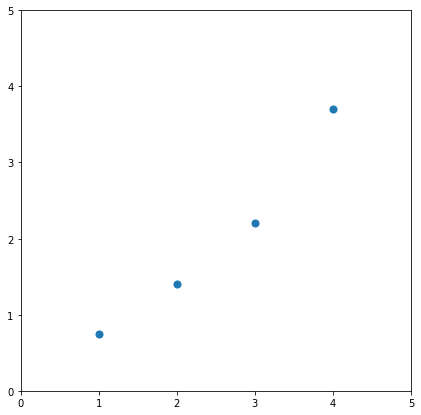

In [71]:
#plot de nube de puntos
xx = np.array([1,2,3,4]) #cordenadas en x
yy = np.array([0.75,1.4,2.2,3.7]) #cordenadas en y
plt.figure(figsize=(7,7))
plt.scatter(xx,yy, s=50, marker='o')
plt.xlim((0,5)), plt.ylim((0,5))

<a id='regresion_lineal'></a>

# Ejemplo regresion lineal
Existen muchos ejemplos de ajuste por minimos cuadrados. El mas sencillo y conocido es la regresión lineal, aqui se busca ajustar una recta al conjunto de datos.

![](./imgs/img3.png)
![](./imgs/img5.png)

![](./imgs/img6.png)
![](./imgs/img7.png)
![](./imgs/img8.png)

Veamos un ejemplo del calculo de los coeficientes de la regresión para el conjunto de los 4 datos presentados previamente

In [72]:
df = pd.DataFrame({'x_i': xx, 'y_i':yy})
display(df)
xpro, ypro = df['x_i'].mean(), df['y_i'].mean()
df['y_i(x_i-x_pro)'] = df['y_i']*(df['x_i']-xpro) #Se calcula la operacion del numerador
df['x_i(x_i-x_pro)'] = df['x_i']*(df['x_i']-xpro) #Se calcula la operacion del denominador
display(df)
a_1 = (df['y_i(x_i-x_pro)'].sum()) / (df['x_i(x_i-x_pro)'].sum()) #se calcula a1
a_0 = ypro - a_1*xpro # se calcula a0
print(f'a1 = {a_1}, a0 = {a_0}')

,x_i,y_i
0,1,0.75
1,2,1.40
2,3,2.20
3,4,3.70


,x_i,y_i,y_i(x_i-x_pro),x_i(x_i-x_pro)
0,1,0.75,-1.125,-1.5
1,2,1.40,-0.700,-1.0
2,3,2.20,1.100,1.5
3,4,3.70,5.550,6.0


a1 = 0.9650000000000002, a0 = -0.40000000000000036


Veamos la grafica del ajuste encontrado

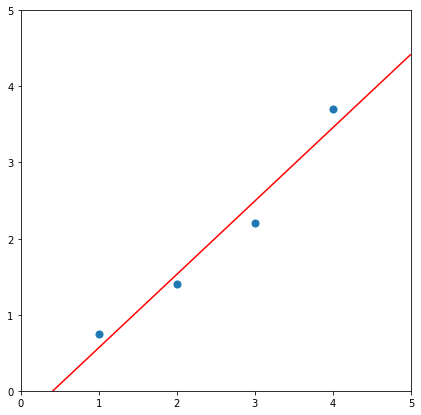

In [73]:
# ------plot de nube de puntos
plt.figure(figsize=(7,7))
plt.scatter(xx,yy, s=50, marker='o')
plt.xlim((0,5)), plt.ylim((0,5))

# ------ linea estimada
x = np.arange(0,5,0.01)
y_estim = a_0 + a_1*x
plt.plot(x,y_estim, c='r')

<a id='formas_lineales'></a>

# Formulación general para formas lineales

Formulación general cuando se quiere ajustar una función como una combinación lineal de diferentes funciones dadas.

![](./imgs/img9.png)
![](./imgs/img10.png)
![](./imgs/img11.png)
![](./imgs/img12.png)

Se introduce ahora funciones para resolver el sistema de ecuaciones mencionado justo arriba. 

In [74]:
def polyFit(xData,yData,m):
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m+1): # se calcula el b
            b[j] = b[j] + temp
            temp = temp*xData[i]
        temp = 1.0
        for j in range(2*m+1): # se calcula los valores de A
            s[j] = s[j] + temp
            temp = temp*xData[i]
    for i in range(m+1): # se llena A
        for j in range(m+1):
            a[i,j] = s[i+j]
    return np.linalg.solve(a,b) #Se resuelve el sistema (tomado de: _______)



In [75]:
coef = polyFit(xx,yy,2)
coef

array([ 0.6625, -0.0975,  0.2125])

Para el calculo de la desviación, definimos la sigueinte función

In [76]:
def stdDev(c,xData,yData):
    def evalPoly(c,x):
        m = len(c) - 1
        p = c[m]
        for j in range(m):
            p = p*x + c[m-j-1] # se define el polinomio de forma recursiva 
        return p
    n = len(xData) - 1
    m = len(c) - 1
    sigma = 0.0
    for i in range(n+1):
        p = evalPoly(c,xData[i])
        sigma = sigma + (yData[i] - p)**2
#     sigma = math.sqrt(sigma/np.abs((n - m))) # <------- Que pasa si tomamos valor absoluto cuando m>n?
    sigma = math.sqrt(sigma/(n - m))
    return sigma

In [77]:
stdDev(coef,xx,yy)

0.12298373876248797

Por ultimo definimos la siguiente función para pintar el ajuste encontrado

In [78]:
def plotPoly(xData,yData,coeff,xlab='x',ylab='y'):
    m = len(coeff)
    x1 = min(xData)
    x2 = max(xData)
    dx = (x2 - x1)/20.0
    x = np.arange(x1,x2 + dx/10.0,dx)
    y = np.zeros((len(x)))*1.0
    for i in range(m):
        y = y + coeff[i]*x**i
    plt.title(f'm= {m-1}. Error = {stdDev(coef,xx,yy)}')
    plt.plot(xData,yData,'o',x,y,'-')
    plt.xlabel(xlab); plt.ylabel(ylab)
    plt.grid (True)
    plt.show()

Ejemplo ajustando con 1,2, y 3 funciones

orden 1 --> [-0.4    0.965]


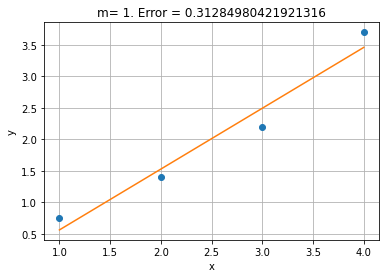

orden 2 --> [ 0.6625 -0.0975  0.2125]


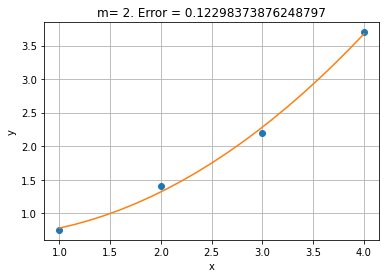

orden 3 --> [-0.3         1.43333333 -0.475       0.09166667]


<ipython-input-76-e64015ad713c>:15: RuntimeWarning: divide by zero encountered in double_scalars
  sigma = math.sqrt(sigma/(n - m))


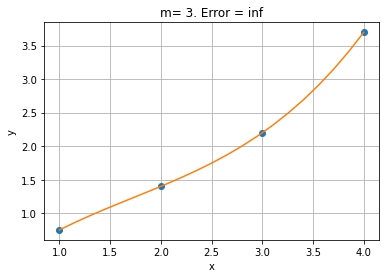

In [80]:
for i in [1,2, 3]:
    coef = polyFit(xx,yy,i)
    print(f'orden {i} --> {coef}')
    plotPoly(xx,yy,coef)        
    plt.show()



<a id='pesos_residuales'></a>

# Pesos residuales

Que pasa si introducimos pesos al ajuste buscado?

![](./imgs/img13.png)
![](./imgs/img14.png)
![](./imgs/img15.png)

![](./imgs/img16.png)
![](./imgs/img17.png)
![](./imgs/img18.png)

## Ejercicio

![](./imgs/img19.png)

### 1) Calculemos el ajuste utilizando el logaritmo: $ln y_i$. 

 Para esto buscamos ajustar $\ln(ae^{bx}) = \ln a + bx$

,x,y
0,1.2,7.5
1,2.8,16.1
2,4.3,38.9
3,5.4,67.0
4,6.8,146.6
5,7.9,266.2


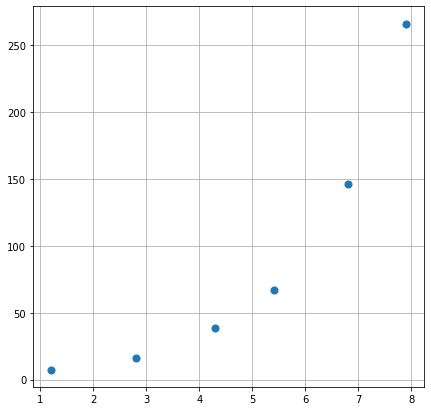

,x,y,z = ln(y)
0,1.2,7.5,2.014903
1,2.8,16.1,2.778819
2,4.3,38.9,3.660994
3,5.4,67.0,4.204693
4,6.8,146.6,4.987708
5,7.9,266.2,5.584248


Factores de la aproximacion lineal f(x) = ln (a) + bx...

 ln (a) = 1.3320646439973554, b = 0.5365836969710379
-------------------------------------------------------------
| Entonces... a = 3.7888579604822263, b= 0.5365836969710379 |
-------------------------------------------------------------


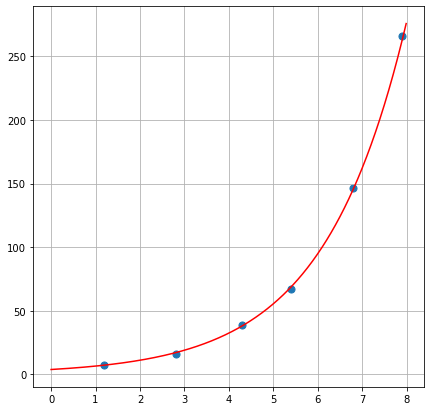

,x,y,z = ln(y),y_estim
0,1.2,7.5,2.014903,7.213578
1,2.8,16.1,2.778819,17.021870
2,4.3,38.9,3.660994,38.068019
3,5.4,67.0,4.204693,68.690892
4,6.8,146.6,4.987708,145.595726
5,7.9,266.2,5.584248,262.716591


,x,y,z = ln(y),y_estim,y-y_estim
0,1.2,7.5,2.014903,7.213578,0.286422
1,2.8,16.1,2.778819,17.021870,-0.921870
2,4.3,38.9,3.660994,38.068019,0.831981
3,5.4,67.0,4.204693,68.690892,-1.690892
4,6.8,146.6,4.987708,145.595726,1.004274
5,7.9,266.2,5.584248,262.716591,3.483409


----------------------------------
| Desviación: 2.0991601104992066 |
----------------------------------


In [63]:
#----- Se define el conjunto de datos
x = np.array([1.2,2.8,4.3,5.4,6.8,7.9])
y = np.array([7.5, 16.1, 38.9, 67.0, 146.6, 266.2])

#----- Se calcula el logaritmo 
data = pd.DataFrame({'x': x, 'y':y})
display(data)

plt.figure(figsize=(7,7))
plt.scatter(x,y, s=50, marker='o')
plt.grid(True)

plt.show()
data['z = ln(y)'] = np.log(data['y'])
display(data)

#----- Hacemos una regresion lineal con 'x' y 'z'

xpro, zpro = data['x'].mean(), data['z = ln(y)'].mean()

b = (data['z = ln(y)']*(data['x'] - xpro)).sum() / (data['x']*(data['x'] - xpro)).sum()
lna = zpro - a_1 * xpro
print(f'Factores de la aproximacion lineal f(x) = ln (a) + bx...\n\n ln (a) = {lna}, b = {b}')
a = np.exp(lna)
box_print(f'Entonces... a = {a}, b= {b}')

# ------ linea estimada
xrang = np.arange(0,8,0.01)
y_estim = a * np.exp(b*xrang)

plt.figure(figsize=(7,7))
plt.scatter(x,y, s=50, marker='o')
plt.grid(True)
plt.plot(xrang,y_estim, c='r')
plt.show()

# ------ Calculando desviación
data['y_estim'] = a * np.exp(b * data['x'])
display(data)
data['y-y_estim'] = data['y'] - data['y_estim']
display(data)

std = np.sqrt(((data['y-y_estim']**2).sum() / (6 - 2)))
box_print(f'Desviación: {std}')






### 2) Que pasa si usamos pesos $W_i = y_i$

Para esto tenemos que 

![](./imgs/img21.png)

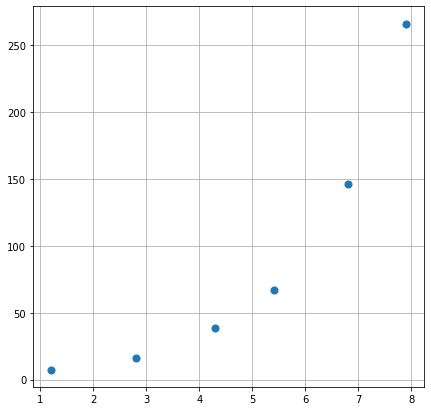

,x,y,z
0,1.2,7.5,2.014903
1,2.8,16.1,2.778819
2,4.3,38.9,3.660994
3,5.4,67.0,4.204693
4,6.8,146.6,4.987708
5,7.9,266.2,5.584248


-----------------------------------------------------
| xhat = 7.47424843422636, zhat = 5.352654999328643 |
-----------------------------------------------------
-----------------------------------------------------------
| Entonces... a = 3.62181882750398, b= 0.5439581915040744 |
-----------------------------------------------------------


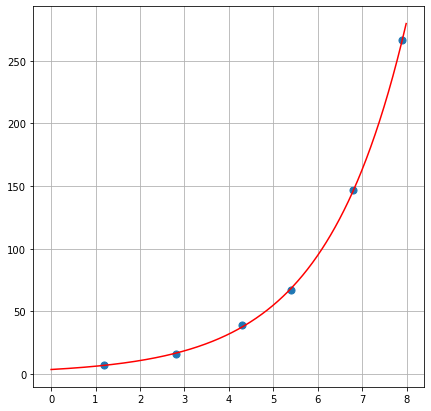

,x,y,z,y_estim
0,1.2,7.5,2.014903,6.956846
1,2.8,16.1,2.778819,16.610903
2,4.3,38.9,3.660994,37.562137
3,5.4,67.0,4.204693,68.330114
4,6.8,146.6,4.987708,146.334053
5,7.9,266.2,5.584248,266.199506


,x,y,z,y_estim,y-y_estim
0,1.2,7.5,2.014903,6.956846,0.543154
1,2.8,16.1,2.778819,16.610903,-0.510903
2,4.3,38.9,3.660994,37.562137,1.337863
3,5.4,67.0,4.204693,68.330114,-1.330114
4,6.8,146.6,4.987708,146.334053,0.265947
5,7.9,266.2,5.584248,266.199506,0.000494


--------------------------------
| Desviación: 1.02296687350799 |
--------------------------------


In [68]:
x = np.array([1.2,2.8,4.3,5.4,6.8,7.9])
y = np.array([7.5, 16.1, 38.9, 67.0, 146.6, 266.2])
plt.figure(figsize=(7,7))
plt.scatter(x,y, s=50, marker='o')
plt.grid(True)
plt.show()



data = pd.DataFrame({'x': x, 'y':y})
data['z'] = np.log(data['y'])
display(data)

xhat = (data['x']*data['y']**2).sum() / (data['y']**2).sum()
zhat = (data['z']*data['y']**2).sum() / (data['y']**2).sum()
box_print(f'xhat = {xhat}, zhat = {zhat}')

b = (data['y']**2 * data['z'] * (data['x'] - xhat)).sum() / (data['y']**2 * data['x'] * (data['x'] - xhat)).sum()
lna = zhat - b*xhat
a = np.exp(lna)

box_print(f'Entonces... a = {a}, b= {b}')

# ------ linea estimada
xrang = np.arange(0,8,0.01)
y_estim = a * np.exp(b*xrang)

plt.figure(figsize=(7,7))
plt.scatter(x,y, s=50, marker='o')
plt.grid(True)
plt.plot(xrang,y_estim, c='r')
plt.show()

# ------ Calculando desviación
data['y_estim'] = a * np.exp(b * data['x'])
display(data)
data['y-y_estim'] = data['y'] - data['y_estim']
display(data)

std = np.sqrt(((data['y-y_estim']**2).sum() / (6 - 2)))
box_print(f'Desviación: {std}')


<a id='refe'></a>
# Referencias

[1] Jaan Kiussalas. Numerical Methods in Engineering with Python. (2011).
